# 1 - Define the problems / Questions

2 -  Data Collections -

3 -  Data Cleaning -
 - Handle missing values
 - Identify and remove duplicates
 - Handle outliers
 - Transform the data into suitable format


4 -  EDA - Exploratory Data Analysis.


5 - Data Visualizations-


6 - Analyze the insights & Report


In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
titanic = sns.load_dataset("titanic")

In [80]:
# initial data inspection

In [81]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [82]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [83]:
# As we seen, the data contain some missing values.
# So lets check the exact number

In [84]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


# Insights

 - age -  177 missing values - should be imputed based on pclass or sex - replace by mean or median
 - embarked - 2 missing values -  can be filled with mode
 - deck - massive values -  better to drop this column


# .fillna()

.dropna.dop()

In [85]:
# fill with median age based on pclass & sex

In [86]:
titanic['age'] = titanic.groupby(['pclass','sex'])['age'].transform(lambda x : x.fillna(x.median()))

In [87]:
titanic['age'].isnull().sum()

0

In [88]:
# replace embark with mode

In [89]:
titanic['embarked'].mode()[0]

'S'

In [90]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0],inplace = True)
# inplace = True is for permenent changes

<ipython-input-90-ef25abfff116>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0],inplace = True)


In [91]:
titanic['embarked'].isnull().sum()

0

In [92]:
titanic.drop(columns=['deck'],inplace= True)

In [93]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [94]:
titanic.drop(columns=['who','embark_town','alive', 'adult_male'], inplace= True)

In [95]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
alone,0


In [96]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
alone,0


In [97]:
titanic.shape

(891, 10)

After dropping unwanted columns the titanic dataset now has 891 rows describe the 891 passanger details and 10 columns which shows the passanger features.

In [98]:
# lets check for statistical summery of the data

In [99]:
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646,491,537
mean,0.383838,2.308642,NaN,29.112424,0.523008,0.381594,32.204208,NaN,NaN,NaN
std,0.486592,0.836071,NaN,13.304424,1.102743,0.806057,49.693429,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,21.500000,0.000000,0.000000,7.910400,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,26.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,36.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN


- survival rate only 38% while 62% did not survived

- half of the passanger were in third class

- most passanger were young adult -  median age =  26 year

- must be outlier in age shown 80 year old also

- median fare 14.45 but max was 512.33-it also may contain otliers most passanger travel alone

-most passanger embarked from 'S'

- most passanger class is Third Class

In [100]:
titanic.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,True
887,False
888,False
889,False


In [101]:
titanic.duplicated().sum()

118

In [102]:
titanic.drop_duplicates(inplace = True)

In [103]:
titanic.duplicated().sum()

0

In [104]:
titanic.shape

(773, 10)

In [105]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,alone
0,0,3,male,22.0,1,0,7.25,S,Third,False


# EDA

In [106]:
# 1- What is the overall distribution of passangers across different class(pclass)?

In [107]:
titanic['pclass'].unique()

array([3, 1, 2])

In [108]:
pclass_count = titanic['pclass'].value_counts().sort_index()

In [109]:
pclass_count

,count
pclass,
1,209
2,164
3,400


In [110]:
pclass_count.values

array([209, 164, 400])

<ipython-input-111-babc9f109416>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pclass_count.index,y = pclass_count.values, palette = 'pastel')


Text(0.5, 1.0, 'Distribution of passanger across different pclass')

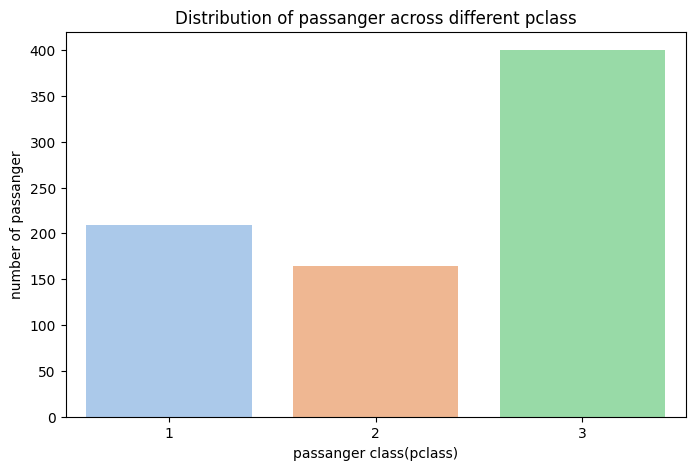

In [111]:
plt.figure(figsize=(8,5))
sns.barplot(x=pclass_count.index,y = pclass_count.values, palette = 'pastel')
plt.xlabel("passanger class(pclass)")
plt.ylabel("number of passanger")
plt.title("Distribution of passanger across different pclass")


# Insights from pclass distribution

- Majority of the passanger travelled in pclass3, indicating it was the most affordable and popular.

- pclass 1 had the least number of passanger, suggesting that fewer could afford luxury travel.

- pclass2 - had moderate number of passanger showing a middle class passanger on the titanic.

In [112]:
#2 - How is the age of passanger distribution

Text(0.5, 1.0, 'Distribution of passanger Ages on Titanic ')

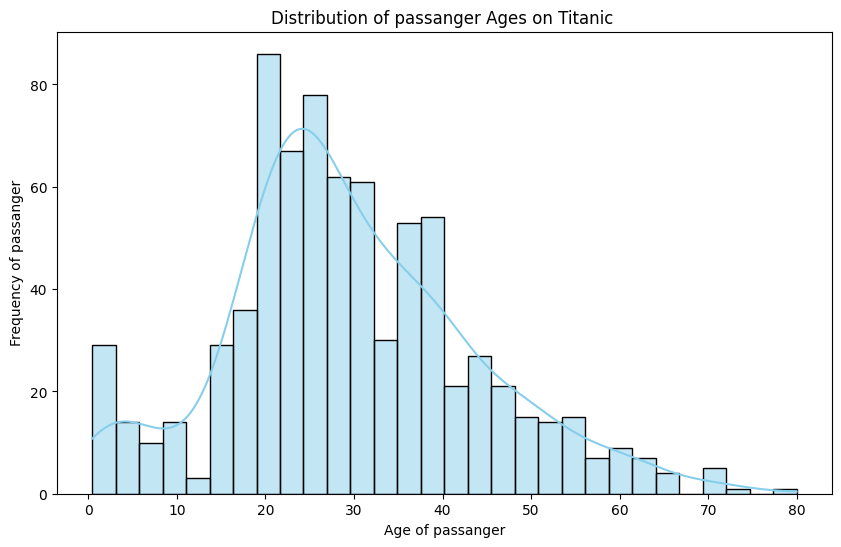

In [113]:
plt.figure(figsize=(10,6))
sns.histplot(data = titanic, x = 'age' , bins = 30, kde =  True , color = 'skyblue')

plt.xlabel("Age of passanger")
plt.ylabel("Frequency of passanger")
plt.title("Distribution of passanger Ages on Titanic ")


# Insights from age distribution

- The peak age group is 20-30 year .  indicating many young adults traveled.

- There are fewer childrens (age < 10) and elderly ( age > 60) on board.

- The age distribution has a long tail on the right , indicating some passangers were much older (May be outlier),not supposed to be board.

In [114]:
# 3 - What is the distribution of passanger based on Sex?

In [115]:
titanic['sex'].unique()

array(['male', 'female'], dtype=object)

In [116]:
gender_count = titanic['sex'].value_counts()

In [117]:
gender_count

,count
sex,
male,482
female,291


In [118]:
gender_count.index

Index(['male', 'female'], dtype='object', name='sex')

In [119]:
gender_count.values

array([482, 291])

<ipython-input-120-79259e4c33f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = gender_count.index, y = gender_count.values, palette= 'viridis')


Text(0.5, 1.0, 'Distribution pf passanger basedc on gender')

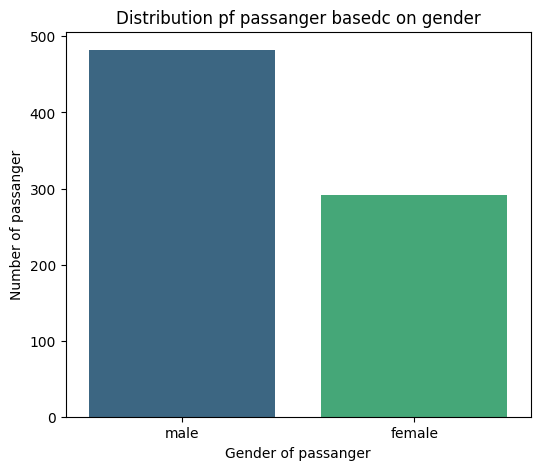

In [120]:
plt.figure(figsize=(6,5))
sns.barplot(x = gender_count.index, y = gender_count.values, palette= 'viridis')
plt.xlabel("Gender of passanger")
plt.ylabel("Number of passanger")
plt.title("Distribution pf passanger basedc on gender")


# Insights from Gender Distribution

- The dataset shows more male passanger than female

- Since the titanic was a mix imigrants ,workers, healthy workers,healthy workers,men might have traveled more for work and opportunity.

In [121]:
# 4 - How many passangrs embarked from each other port(Embarked)?

In [122]:
titanic['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [123]:
# S - Southampton, C - Cherbourg, Q - Queenstown

In [124]:
embarked_count = titanic['embarked'].value_counts()

In [125]:
embarked_count

,count
embarked,
S,562
C,153
Q,58


<ipython-input-126-9423c66088f9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=embarked_count.index,y=embarked_count.values,palette='rocket')


Text(0.5, 1.0, 'Number of passanger embarked from each port')

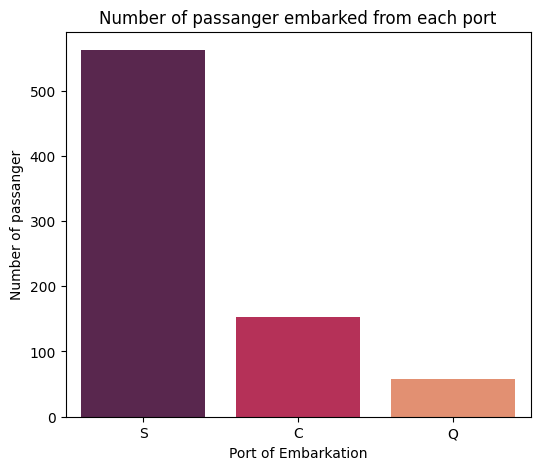

In [126]:
plt.figure(figsize=(6,5))
sns.barplot(x=embarked_count.index,y=embarked_count.values,palette='rocket')
plt.xlabel("Port of Embarkation")
plt.ylabel("Number of passanger")
plt.title("Number of passanger embarked from each port")

#Insights from Embarked Distribution

- Majority of passanger embarked from S-Southampton

- Moderate passanger embarked from C - Cherbourg

- Q - Queenstown had least number of passanger

In [127]:
# 5 - What is the survival rate overall, and how does it vary by pclass?

In [128]:
overall_survival_rate = titanic['survived'].mean()*100

In [129]:
overall_survival_rate

41.52652005174644

In [130]:
survival_by_pclass = titanic.groupby('pclass')['survived'].mean()*100

In [131]:
survival_by_pclass

,survived
pclass,
1,64.114833
2,50.609756
3,26.000000


In [132]:
survival_by_pclass.index

Index([1, 2, 3], dtype='int64', name='pclass')

In [133]:
survival_by_pclass.values

array([64.11483254, 50.6097561 , 26.        ])

<ipython-input-134-4c77a39a0974>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_pclass.index,y = survival_by_pclass.values,palette = 'Set1')


Text(0.5, 1.0, 'Survival Rate by pclass')

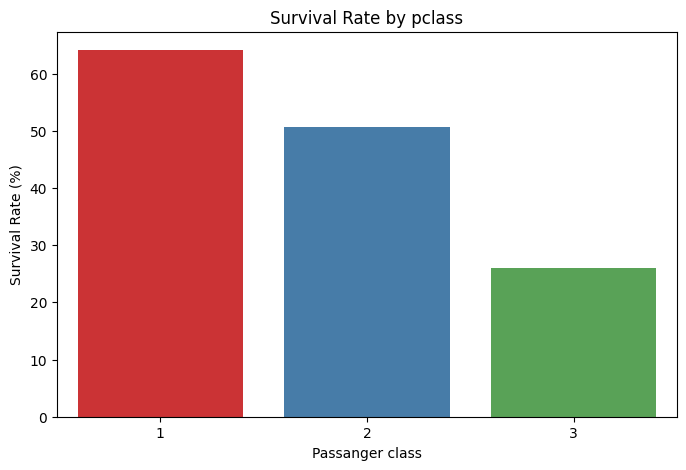

In [134]:
plt.figure(figsize=(8,5))
sns.barplot(x=survival_by_pclass.index,y = survival_by_pclass.values,palette = 'Set1')
plt.xlabel('Passanger class')
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by pclass")

# Insights on Survival rate by pclass

 - Only 41% of passanger survived,indicating a high fatality rate.
 - 1st class had highest survival rate ~ 64%, passanger had better access to lifeboats and safety.

-Moderate survival rate im2nd class ~ 50%,some middle class passanger survived by not as many pclass1

-Lowest survival rate in 3rd class-26%,passanger due to fewer safety resources.

In [135]:
# 6- What is the survival rate for males vs females?

In [136]:
survival_by_gender = titanic.groupby("sex")['survived'].mean()*100

In [137]:
survival_by_gender

,survived
sex,
female,73.883162
male,21.991701


<ipython-input-138-14a6fb363267>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = survival_by_gender.index,y = survival_by_gender.values,palette = "Set1")


Text(0.5, 1.0, 'Survival Rate by gender')

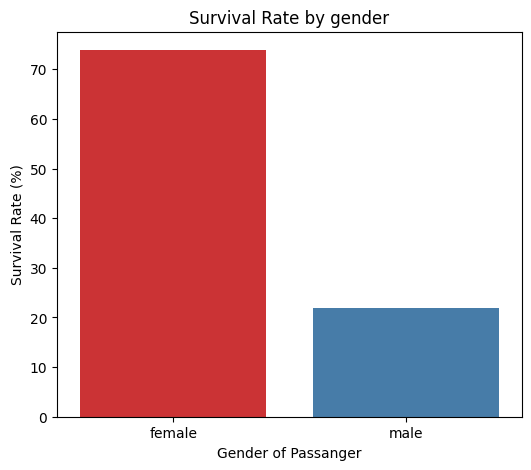

In [138]:
plt.figure(figsize = (6,5))
sns.barplot(x = survival_by_gender.index,y = survival_by_gender.values,palette = "Set1")
plt.xlabel("Gender of Passanger")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by gender")

Passangers from C(Cherbourg)had highest survival rate(~58.8%)
- Many first - class passangers

In [139]:
# 7 - What is the survival rate of passangers from different embarkation points?

In [140]:
survival_by_embarked = titanic.groupby("embarked")["survived"].mean()*100

In [141]:
survival_by_embarked

,survived
embarked,
C,58.823529
Q,34.482759
S,37.544484


<ipython-input-142-7745ae3e2eee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = survival_by_embarked.index, y = survival_by_embarked.values,palette="Set1")


Text(0.5, 1.0, 'Survival Rate by embarked')

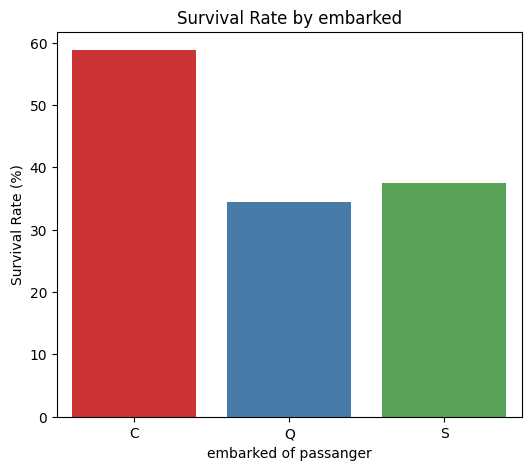

In [142]:
plt.figure(figsize = (6,5))
sns.barplot(x = survival_by_embarked.index, y = survival_by_embarked.values,palette="Set1")
plt.xlabel("embarked of passanger")
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by embarked")

In [143]:
# 8 - How does the survival rate vary across different ticket classes?

In [144]:
overall_survival_rate = titanic['survived'].mean()*100

In [145]:
overall_survival_rate

41.52652005174644

In [146]:
survival_by_pclass = titanic.groupby("pclass")['survived'].mean()*100

In [147]:
survival_by_pclass

,survived
pclass,
1,64.114833
2,50.609756
3,26.000000


In [148]:
survival_by_pclass.index

Index([1, 2, 3], dtype='int64', name='pclass')

In [149]:
survival_by_pclass.values

array([64.11483254, 50.6097561 , 26.        ])

<ipython-input-153-6c79391cb677>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_pclass.index,y = survival_by_pclass.values,palette="Set1")


Text(0.5, 1.0, 'Survival Rate by pclass')

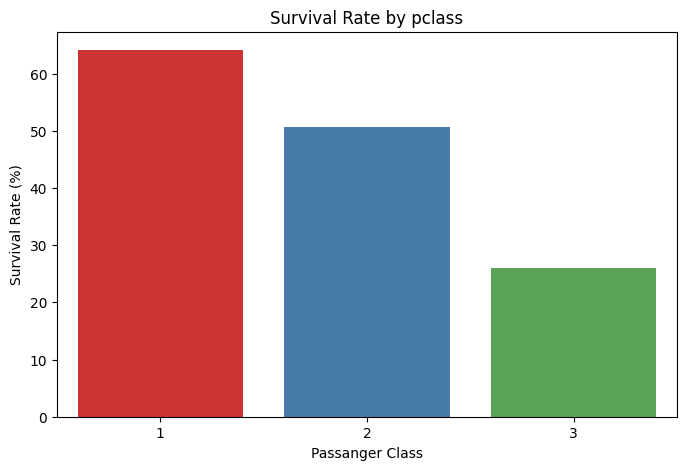

In [153]:
plt.figure(figsize=(8,5))
sns.barplot(x=survival_by_pclass.index,y = survival_by_pclass.values,palette="Set1")
plt.xlabel('Passanger Class')
plt.ylabel("Survival Rate (%)")
plt.title("Survival Rate by pclass")